## Sampling-based vs. Anytime Planners
In this notebook, we investigate the trade-off between sampling-based and anytime planners to compare the results from an anytime planner against the sampling-based planner in combination with a post-smoothing method. They could take approximately the same time and maybe it is beneficial to have a fast planner and an efficitive post-smoothing step vs. a single anytime planner.

In [4]:
import os
os.chdir("/home/eric/mpb/plotting")

In [8]:
%load_ext autoreload
%autoreload 2
import mpb
from mpb import MPB, MultipleMPB

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
sampling_planners = ['rrt', 'est', 'prm', 'theta_star']
anytime_planners = ['rrt_star', 'informed_rrt_star', 'prm_star', 'bfmt', 'cforest']

pool = MultipleMPB()
for planner in sampling_planners:
    m = MPB()
    m.set_corridor_grid_env(width=150, height=150, branches=100, radius=4)
    print("Set planner to", planner)
    m.set_planners([planner])
    m.set_steer_functions(['reeds_shepp'])
    m.set_smoothers(['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max'])
    m.set_id('sampling_%s' % planner)
    pool.benchmarks.append(m)    

for planner in anytime_planners:
    m = MPB()
    m.set_corridor_grid_env(width=150, height=150, branches=100, radius=4)
    m.set_planners([planner])
    m.set_steer_functions(['reeds_shepp'])
    m["max_planning_time"] = 5
    m.set_smoothers([])
    m.set_id('anytime_%s' % planner)
    pool.benchmarks.append(m)
pool.run_parallel('sam_vs_any', runs=5)

Set planner to rrt
Selected planners: ['rrt']
Selected steer functions: ['reeds_shepp']
Selected smoothers: ['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max']
Set planner to est
Selected planners: ['est']
Selected steer functions: ['reeds_shepp']
Selected smoothers: ['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max']
Set planner to prm
Selected planners: ['prm']
Selected steer functions: ['reeds_shepp']
Selected smoothers: ['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max']
Set planner to theta_star
Selected planners: ['theta_star']
Selected steer functions: ['reeds_shepp']
Selected smoothers: ['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max']
Selected planners: ['rrt_star']
Selected steer functions: ['reeds_shepp']
Selected smoothers: []
Selected planners: ['informed_rrt_star']
Selected steer functions: ['reeds_shepp']
Selected smoothers: []
Selected planners: ['prm_star']
Selected steer functions: ['reeds_shepp']
Selected smoothers: [


Benchmark 3 (sampling_theta_star) finished successfully.

Benchmark 7 (anytime_bfmt) finished successfully.

Benchmark 1 (sampling_est) finished successfully.

Benchmark 0 (sampling_rrt) finished successfully.

Benchmark 6 (anytime_prm_star) finished successfully.

Benchmark 8 (anytime_cforest) finished successfully.

Benchmark 4 (anytime_rrt_star) finished successfully.

Benchmark 5 (anytime_informed_rrt_star) finished successfully.

Benchmark 2 (sampling_prm) finished successfully.
All benchmarks succeeded.


In [ ]:
pool.visualize_trajectories(run_id='1', show_smoother=True, show_legend=True)

In [ ]:
pool.plot_planner_stats()

In [ ]:
pool.plot_smoother_stats()

In [20]:
MPB.merge(pool.benchmarks[:4], "sampling_based.json")

Successfully merged [sam_vs_any/sampling_rrt_results.json, sam_vs_any/sampling_est_results.json, sam_vs_any/sampling_prm_results.json, sam_vs_any/sampling_theta_star_results.json] into sampling_based.json.


Visualizing sampling_based.json...


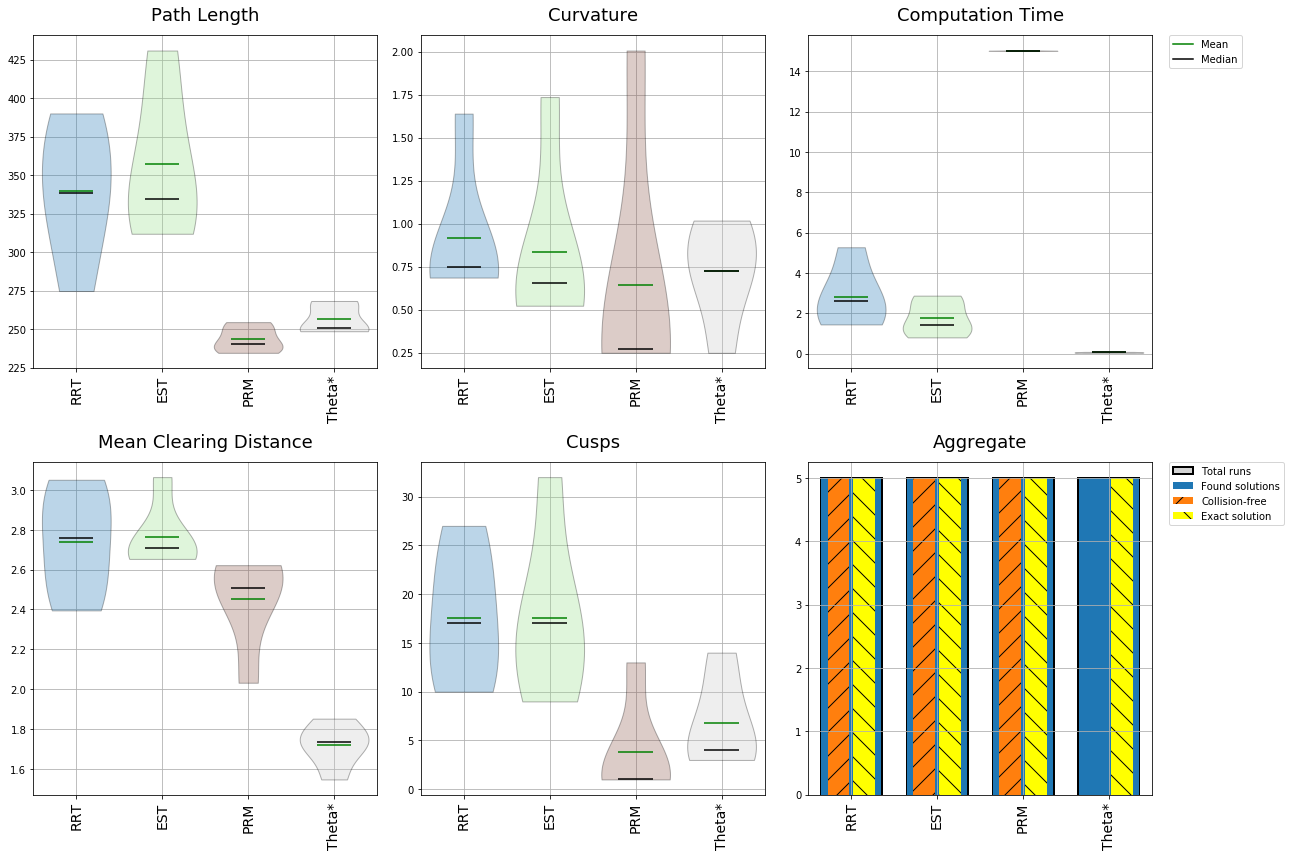

In [21]:
from plot_stats import plot_planner_stats
plot_planner_stats("sampling_based.json")

Visualizing sampling_based.json...


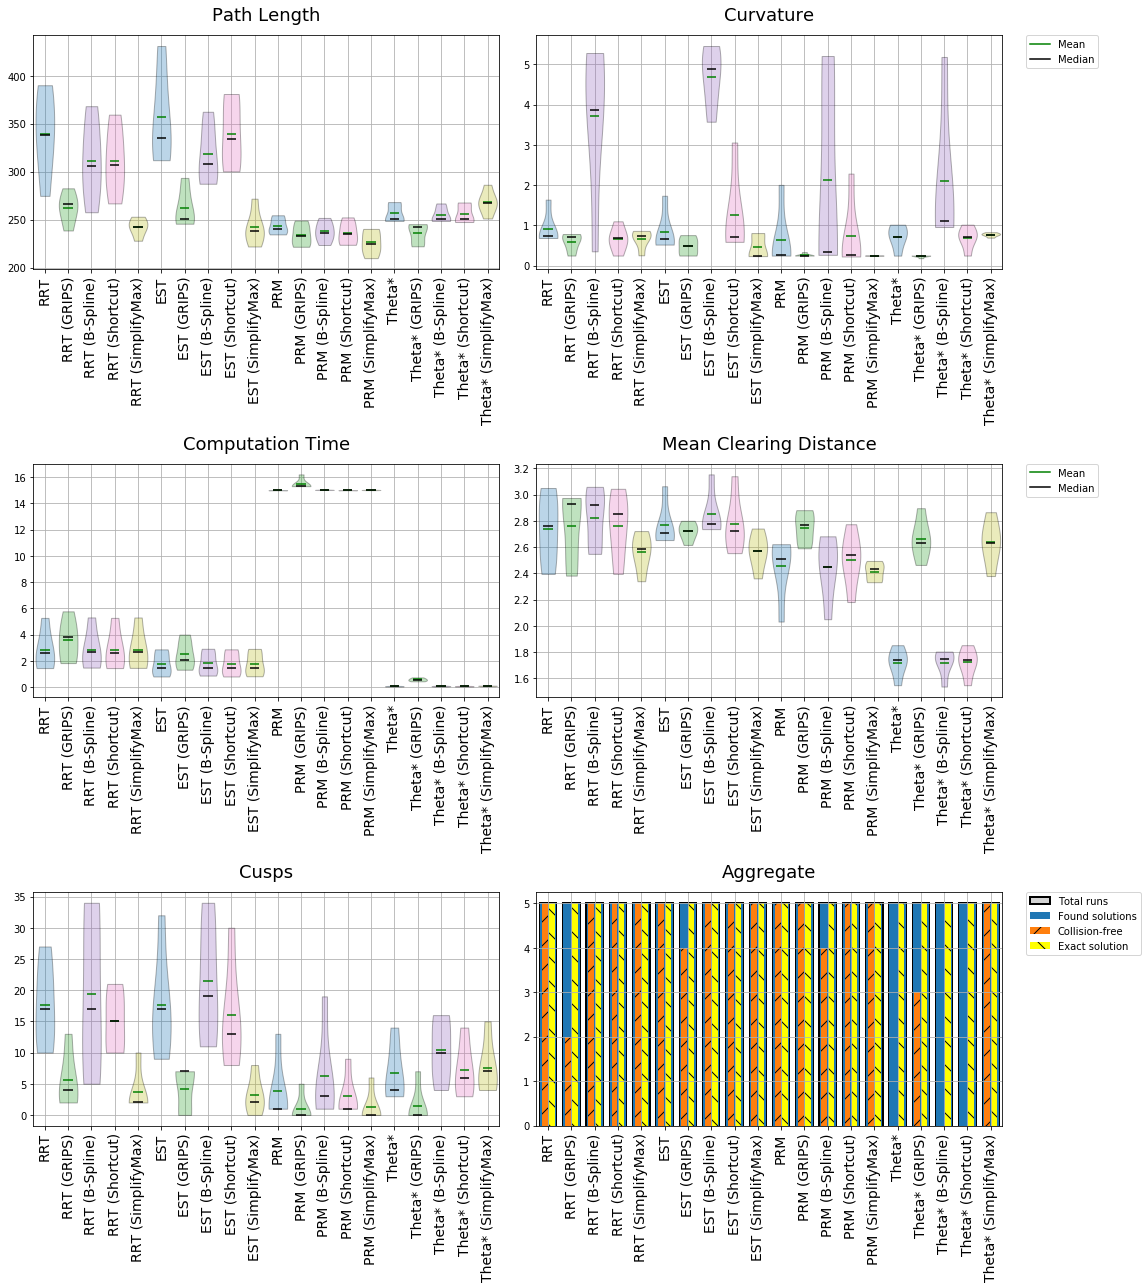

In [24]:
from plot_stats import plot_smoother_stats
plot_smoother_stats("sampling_based.json", num_colors=5)